IMPORT LIBRARIES

In [1]:
import os
os.environ["CELLPOSE_LOCAL_MODELS_PATH"] = "/PATH_FOR_MODELS/"
import time
time.sleep(0.5)
import numpy as np
import time, os, sys
import matplotlib.pyplot as plt
from numpy import savetxt

import skimage.io
time.sleep(0.5)
from cellpose import utils, io
from cellpose import models

import tkinter as tk
from tkinter import filedialog
from tifffile import imsave
import time


SELECT THE IMAGE

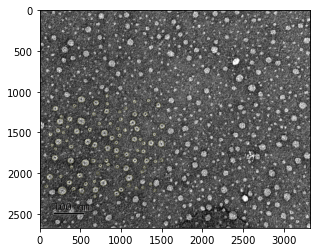

In [2]:
root = tk.Tk()
root.withdraw()

file_path = filedialog.askopenfilename()
stack = skimage.io.imread(file_path)
plt.imshow(stack, cmap='gray')

filename=os.path.basename(file_path)+'_processed.csv'
filename2=os.path.basename(file_path)+'_processed.png'


SELECT ONLY A PART OF THE IMAGE

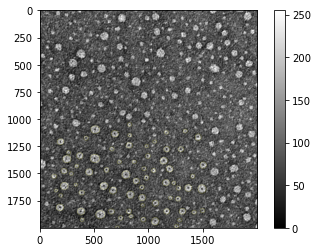

In [3]:


data=stack[0:2000,0:2000]
data[2000:2600,0:1000]=0
#data=np.invert(data)

plt.imshow(data, cmap='gray')
plt.colorbar()

RUN CELLPOSE
CHOOSE MODEL CYTO OR NUCLEI AND DIAMETER SIZE

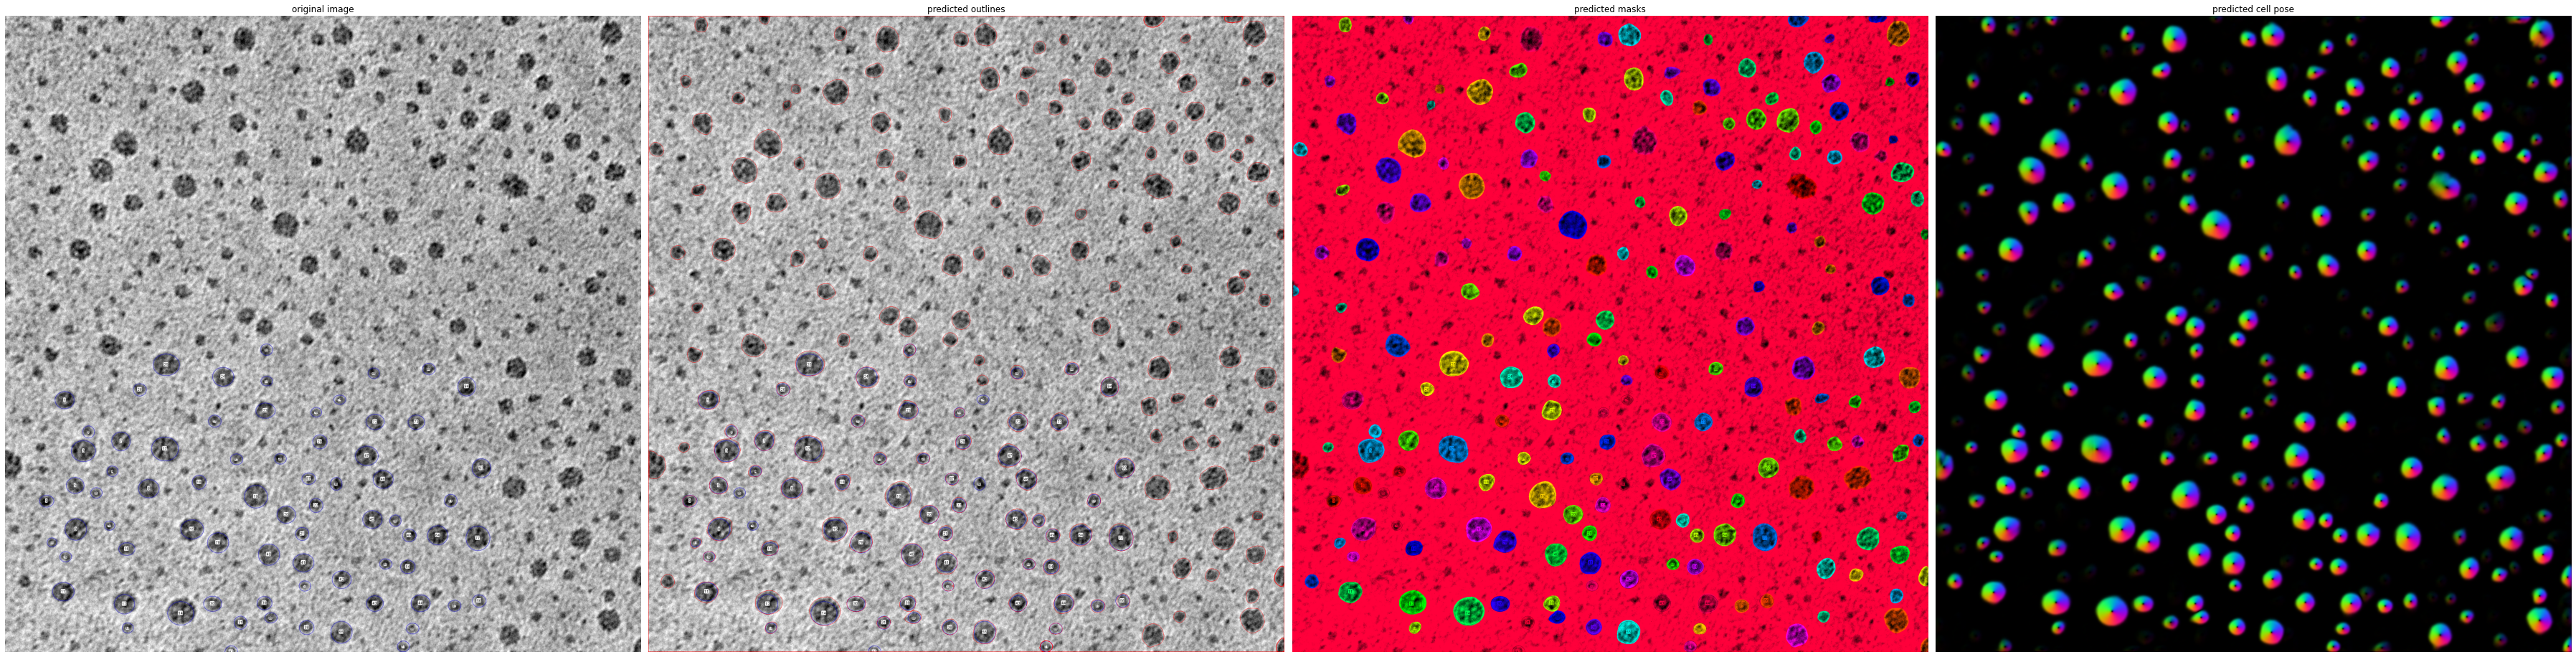

--- 42.622408866882324 seconds ---


In [6]:
start_time = time.time()

# DEFINE CELLPOSE MODEL
# model_type='cyto' or model_type='nuclei'
model = models.Cellpose(gpu=False, model_type='cyto')
channels = [0,0] # IF YOU HAVE GRAYSCALE

masks, flows, styles, diams = model.eval(data, diameter=70, channels=channels)

# DISPLAY RESULTS
from cellpose import plot

fig = plt.figure(figsize=(50,20))
plot.show_segmentation(fig, 255-data, 255-masks, flows[0], channels=channels)
plt.tight_layout()
plt.show()

io.save_to_png(data, masks, flows, filename2)
print("--- %s seconds ---" % (time.time() - start_time))


EXTRACT THE DIAMETER OF THE MASK AND PRINT THE MEAN DIAMETER

In [7]:
DIAM=utils.diameters(masks)
dd=DIAM[1];
print('mean diameter =', np.mean(dd),'pixels')
print('number of particles=',dd.size)

mean diameter = 46.658479194284766 pixels
number of particles= 194


PLOT HISTOGRAM OF THE VALUES

(array([ 3.,  3.,  4., 12.,  9., 12., 16., 12., 18.,  8.,  5.,  7.,  2.,
         5.,  9., 10.,  5.,  8.,  9.,  6.,  4.,  6.,  3.,  4.,  5.,  2.,
         4.,  1.,  1.,  1.]),
 array([22.02271555, 24.06771361, 26.11271167, 28.15770973, 30.20270779,
        32.24770585, 34.29270391, 36.33770198, 38.38270004, 40.4276981 ,
        42.47269616, 44.51769422, 46.56269228, 48.60769034, 50.65268841,
        52.69768647, 54.74268453, 56.78768259, 58.83268065, 60.87767871,
        62.92267677, 64.96767484, 67.0126729 , 69.05767096, 71.10266902,
        73.14766708, 75.19266514, 77.2376632 , 79.28266127, 81.32765933,
        83.37265739]),
 <BarContainer object of 30 artists>)

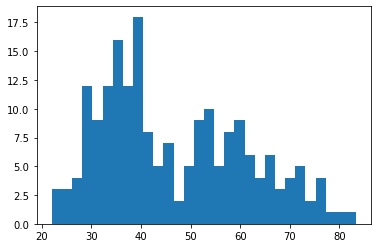

In [8]:
plt.hist(dd,30)

In [9]:
np.savetxt(filename, dd, delimiter=";")

In [10]:
io.save_to_png(data, masks, flows, filename2)
